In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

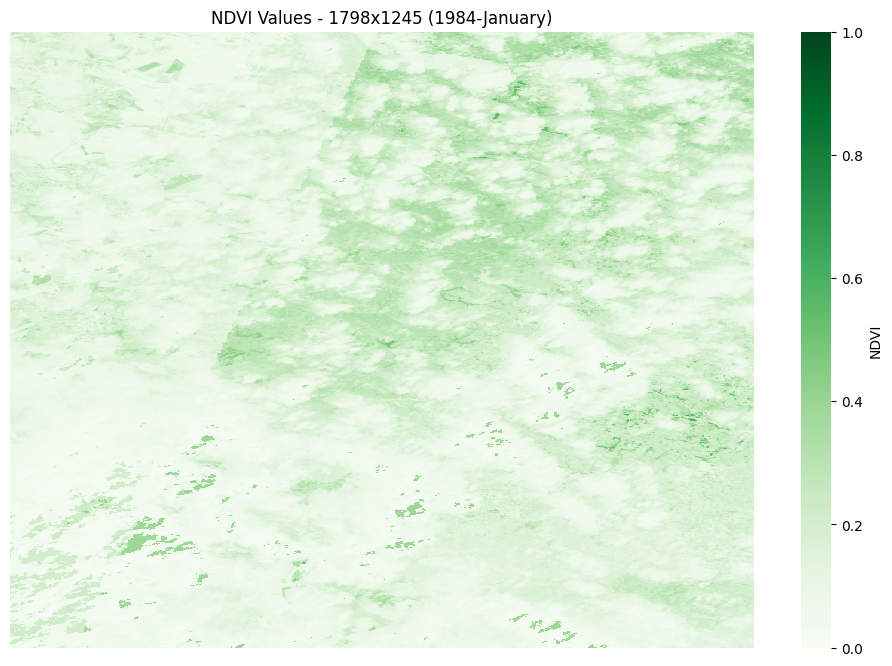

NDVI Statistics for first timestamp:
Mean NDVI: 0.138
Min NDVI: -0.342
Max NDVI: 0.641


In [6]:
# visualize the first timestamp of the data from numpy

# Load the data
data: np.ndarray = np.load('../data/Landsat_NDVI_time_series_1984_to_2024.npy')

# Extract first timestamp NDVI values (all pixels)
first_timestamp_ndvi = data[0, :, :, 0]  # [0] for first timestamp, [:,:,0] for NDVI values

# Create figure with larger size
plt.figure(figsize=(12, 8))

# Create heatmap using seaborn
ax = sns.heatmap(first_timestamp_ndvi, 
                 cmap='Greens',
                 vmin=0,
                 vmax=1,
                 cbar_kws={'label': 'NDVI'})
month = int(data[0,0,0,1])
month_name = datetime.datetime(1900, month, 1).strftime('%B')

plt.title(f'NDVI Values - {first_timestamp_ndvi.shape[0]}x{first_timestamp_ndvi.shape[1]} ({data[0,0,0,2]:.0f}-{month_name})')



plt.axis('off')  # Hide axes
plt.show()

# Print some basic statistics
print(f"NDVI Statistics for first timestamp:")
print(f"Mean NDVI: {np.mean(first_timestamp_ndvi):.3f}")
print(f"Min NDVI: {np.min(first_timestamp_ndvi):.3f}")
print(f"Max NDVI: {np.max(first_timestamp_ndvi):.3f}")

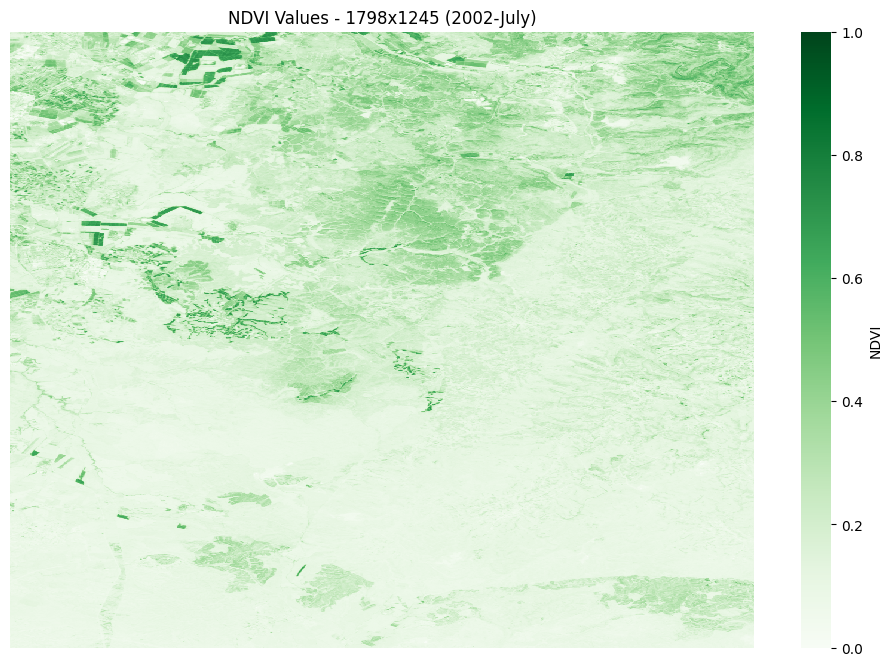

NDVI Statistics for first timestamp:
Mean NDVI: 0.182
Min NDVI: -0.400
Max NDVI: 0.764


In [7]:

# Load the parquet file
df = pd.read_parquet('../data/Landsat_NDVI_time_series_1984_to_2024.parquet')

# Get the first timestamp data (year=1984, month=1)
first_timestamp = df[(df['year'] == 2002) & (df['month'] == 7)]

# Reshape the NDVI values back to 2D grid (1798 x 1245)
ndvi_grid = first_timestamp['ndvi'].values.reshape(1798, 1245)

# Create figure with larger size
plt.figure(figsize=(12, 8))

# Create heatmap using seaborn
ax = sns.heatmap(ndvi_grid, 
                 cmap='Greens',
                 vmin=0,
                 vmax=1,
                 cbar_kws={'label': 'NDVI'})

month = int(first_timestamp['month'].values[0]) 
month_name = datetime.datetime(1900, month, 1).strftime('%B')

plt.title(f'NDVI Values - {first_timestamp_ndvi.shape[0]}x{first_timestamp_ndvi.shape[1]} ({first_timestamp['year'].values[0]:.0f}-{month_name})')
plt.axis('off')  # Hide axes
plt.show()


# Print some basic statistics
print(f"NDVI Statistics for first timestamp:")
print(f"Mean NDVI: {np.mean(ndvi_grid):.3f}")
print(f"Min NDVI: {np.min(ndvi_grid):.3f}")
print(f"Max NDVI: {np.max(ndvi_grid):.3f}")

In [8]:
# Calculate mean NDVI for each timestamp
temporal_means = df.groupby(['year', 'month'])['ndvi'].mean().reset_index()

# Create datetime objects for better x-axis representation
temporal_means['date'] = temporal_means.apply(
    lambda x: datetime.datetime(int(x['year']), int(x['month']), 1), 
    axis=1
)

# same for median
temporal_medians = df.groupby(['year', 'month'])['ndvi'].median().reset_index()

# Create datetime objects for better x-axis representation
temporal_medians['date'] = temporal_medians.apply(
    lambda x: datetime.datetime(int(x['year']), int(x['month']), 1), 
    axis=1
)


Overall Statistics:
Mean NDVI across all time: 0.244
Median NDVI across all time: 0.222
Min NDVI: 0.113
Max NDVI: 0.424

Total number of timestamps: 82


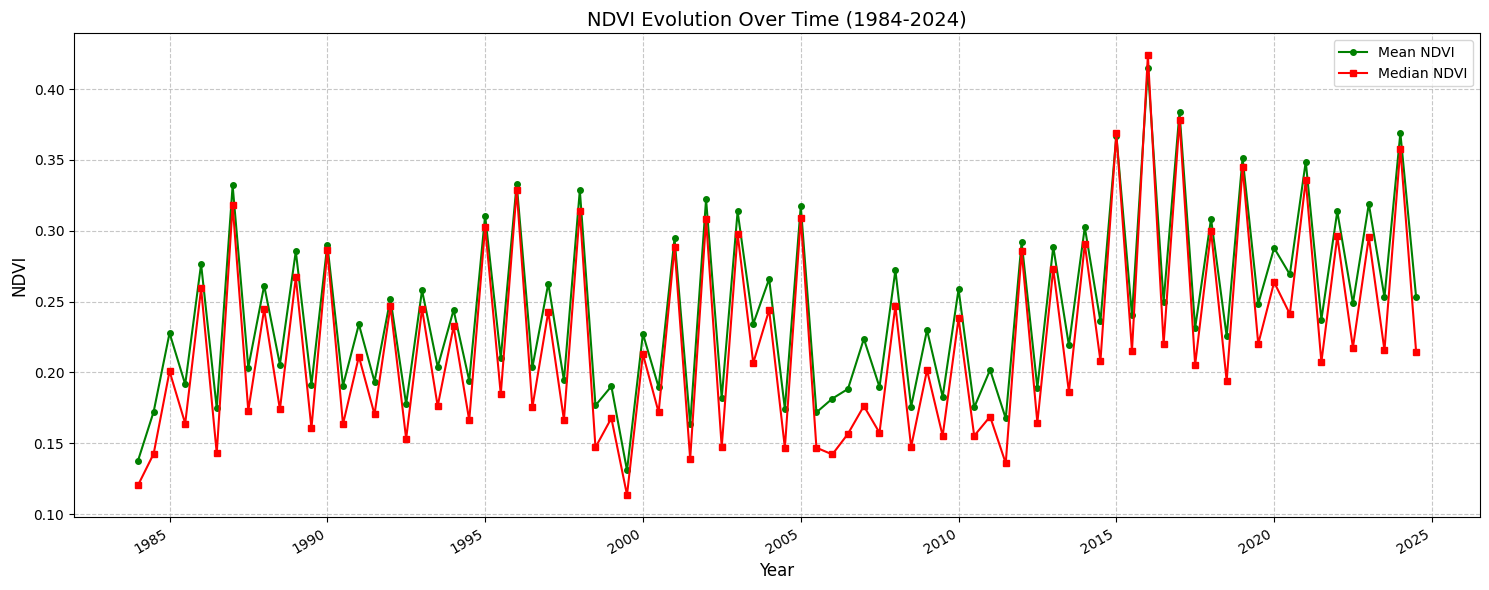


First few timestamps and their NDVI values:
      date  mean_ndvi  median_ndvi
1984-01-01   0.137536     0.120218
1984-07-01   0.172264     0.142573
1985-01-01   0.227791     0.200799
1985-07-01   0.191557     0.163875
1986-01-01   0.276378     0.259247


In [9]:
# Create figure with larger size
plt.figure(figsize=(15, 6))

# Plot mean NDVI
plt.plot(temporal_means['date'], 
         temporal_means['ndvi'], 
         color='green', 
         linewidth=1.5,
         marker='o',  # Add circular markers
         markersize=4,
         label='Mean NDVI')  # Add label for legend

# Plot median NDVI
plt.plot(temporal_medians['date'],
         temporal_medians['ndvi'],
         color='red',
         linewidth=1.5, 
         marker='s',  # Square markers to differentiate
         markersize=4,
         label='Median NDVI')

# Customize the plot
plt.title('NDVI Evolution Over Time (1984-2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('NDVI', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()  # Show legend

# Format x-axis to show years nicely
plt.gcf().autofmt_xdate()  # Rotate and align the tick labels

# Add some statistics
print(f"Overall Statistics:")
print(f"Mean NDVI across all time: {temporal_means['ndvi'].mean():.3f}")
print(f"Median NDVI across all time: {temporal_medians['ndvi'].mean():.3f}")
print(f"Min NDVI: {min(temporal_means['ndvi'].min(), temporal_medians['ndvi'].min()):.3f}")
print(f"Max NDVI: {max(temporal_means['ndvi'].max(), temporal_medians['ndvi'].max()):.3f}")
print(f"\nTotal number of timestamps: {len(temporal_means)}")

plt.tight_layout()
plt.show()

# Optional: Display the first few rows of both temporal means and medians
print("\nFirst few timestamps and their NDVI values:")
comparison = temporal_means[['date', 'ndvi']].copy()
comparison.columns = ['date', 'mean_ndvi']
comparison['median_ndvi'] = temporal_medians['ndvi']
print(comparison.head().to_string(index=False))

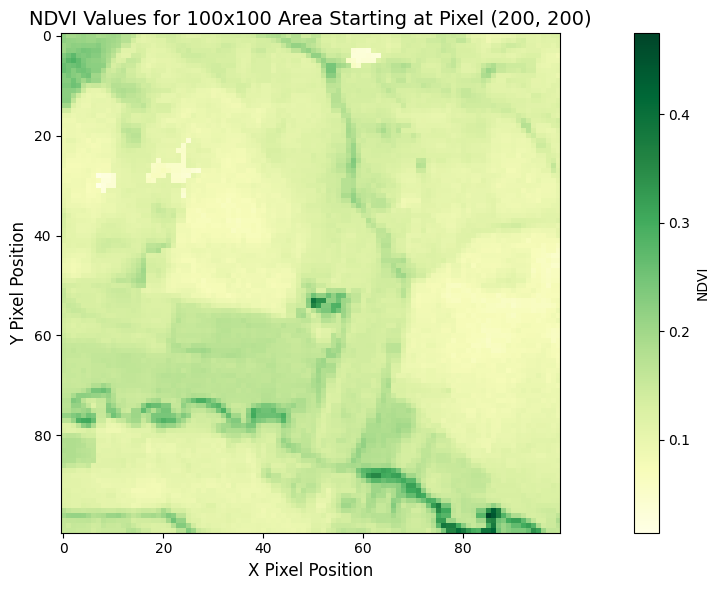

In [12]:
# Plot NDVI area of 100*100 across 5 years starting from pixel at location 200,200
start_x, start_y = 200, 200
area_size = 100

# Create a figure with subplots
plt.figure(figsize=(15, 6))

# Plot the NDVI values as a heatmap
plt.imshow(ndvi_grid[start_y:start_y+area_size, start_x:start_x+area_size], 
           cmap='YlGn',  # Yellow-Green colormap commonly used for NDVI
           interpolation='nearest')

# Add a colorbar
plt.colorbar(label='NDVI')

# Customize the plot
plt.title(f'NDVI Values for 100x100 Area Starting at Pixel ({start_x}, {start_y})', fontsize=14)
plt.xlabel('X Pixel Position', fontsize=12)
plt.ylabel('Y Pixel Position', fontsize=12)

plt.tight_layout()
plt.show()




Central pixel coordinates: 31.7199°N, 34.8140°E


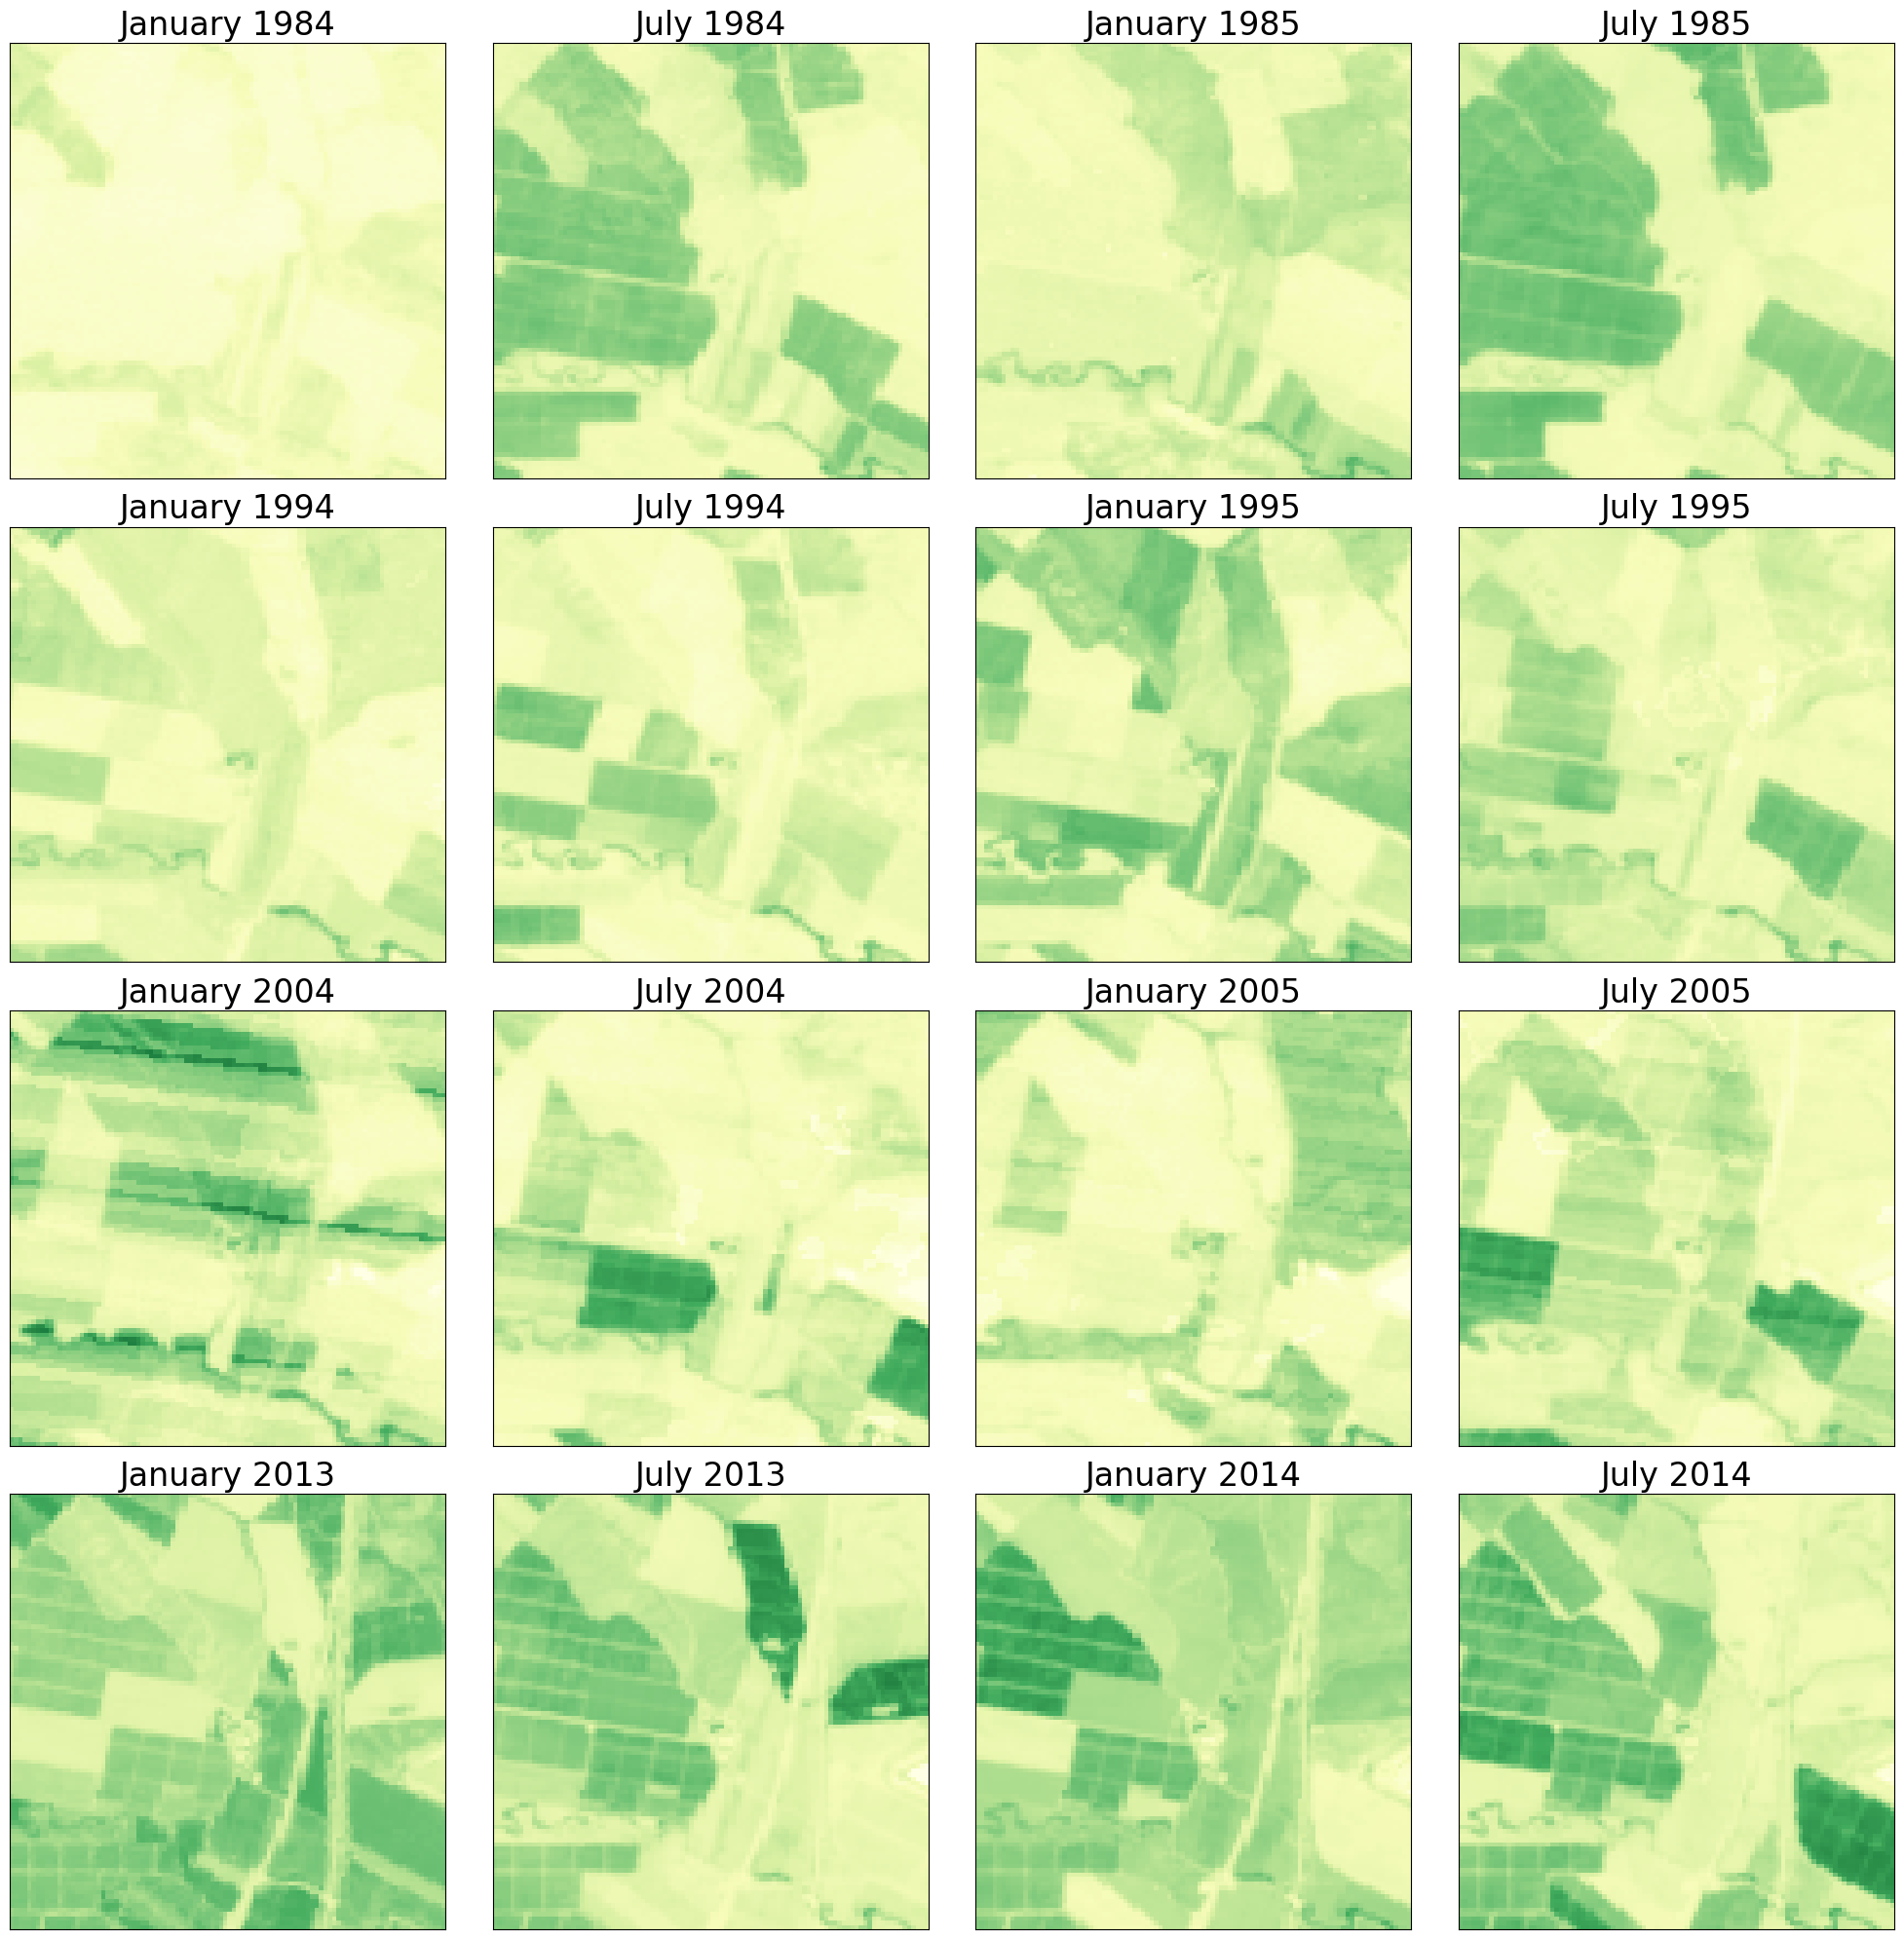

In [53]:
def plot_ndvi_area_over_time(start_x: int, start_y: int, area_size: int) -> None:
    """Plot NDVI area across multiple years.
    
    Args:
        start_x: Starting x coordinate
        start_y: Starting y coordinate 
        area_size: Size of square area to plot
    """
    years_per_row = [1984, 1994, 2004, 2013]
    images_per_row = 4

    # Create a figure with subplots
    fig, axes = plt.subplots(len(years_per_row), images_per_row, figsize=(20, 20))

    # Get reference year and calculate indices
    ref_year = 1984
    ndvi_index = 0

    # Get lat/long of central pixel
    center_y = start_y + area_size // 2
    center_x = start_x + area_size // 2
    lat = data[0, center_y, center_x, 3]  # Index 3 is latitude
    lon = data[0, center_y, center_x, 4]  # Index 4 is longitude
    print(f"Central pixel coordinates: {lat:.4f}°N, {lon:.4f}°E")

    for row, start_year in enumerate(years_per_row):
        year_idx = (start_year - ref_year) * 2  # Calculate index in data array
        
        for col in range(images_per_row):
            # Get NDVI values for the area
            area_ndvi = data[year_idx + col, start_y:start_y+area_size, start_x:start_x+area_size, ndvi_index]
            month = data[year_idx + col, start_y:start_y+area_size, start_x:start_x+area_size, 1]
            years = data[year_idx + col, start_y:start_y+area_size, start_x:start_x+area_size, 2]
            
            # Get the month and year values for this area
            month_val = int(month[0,0])  # Get first value since they should all be the same
            year_val = int(years[0,0])
            
            # Plot the NDVI values as a heatmap
            im = axes[row, col].imshow(area_ndvi,
                                      cmap='YlGn',
                                      interpolation='nearest',
                                      vmin=0,  # Set minimum NDVI value
                                      vmax=1)  # Set maximum NDVI value
            
            # Customize each subplot
            month_names = ['January', 'February', 'March', 'April', 'May', 'June',
                          'July', 'August', 'September', 'October', 'November', 'December']
            month_name = month_names[month_val - 1]  # -1 since months are 1-based
            axes[row, col].set_title(f'{month_name} {year_val}', fontsize=24)  # Increased title font size
            
            # Hide axis ticks and labels
            axes[row, col].set_xticks([])
            axes[row, col].set_yticks([])

    plt.tight_layout()
    plt.show()


plot_ndvi_area_over_time(200, 200, 100)

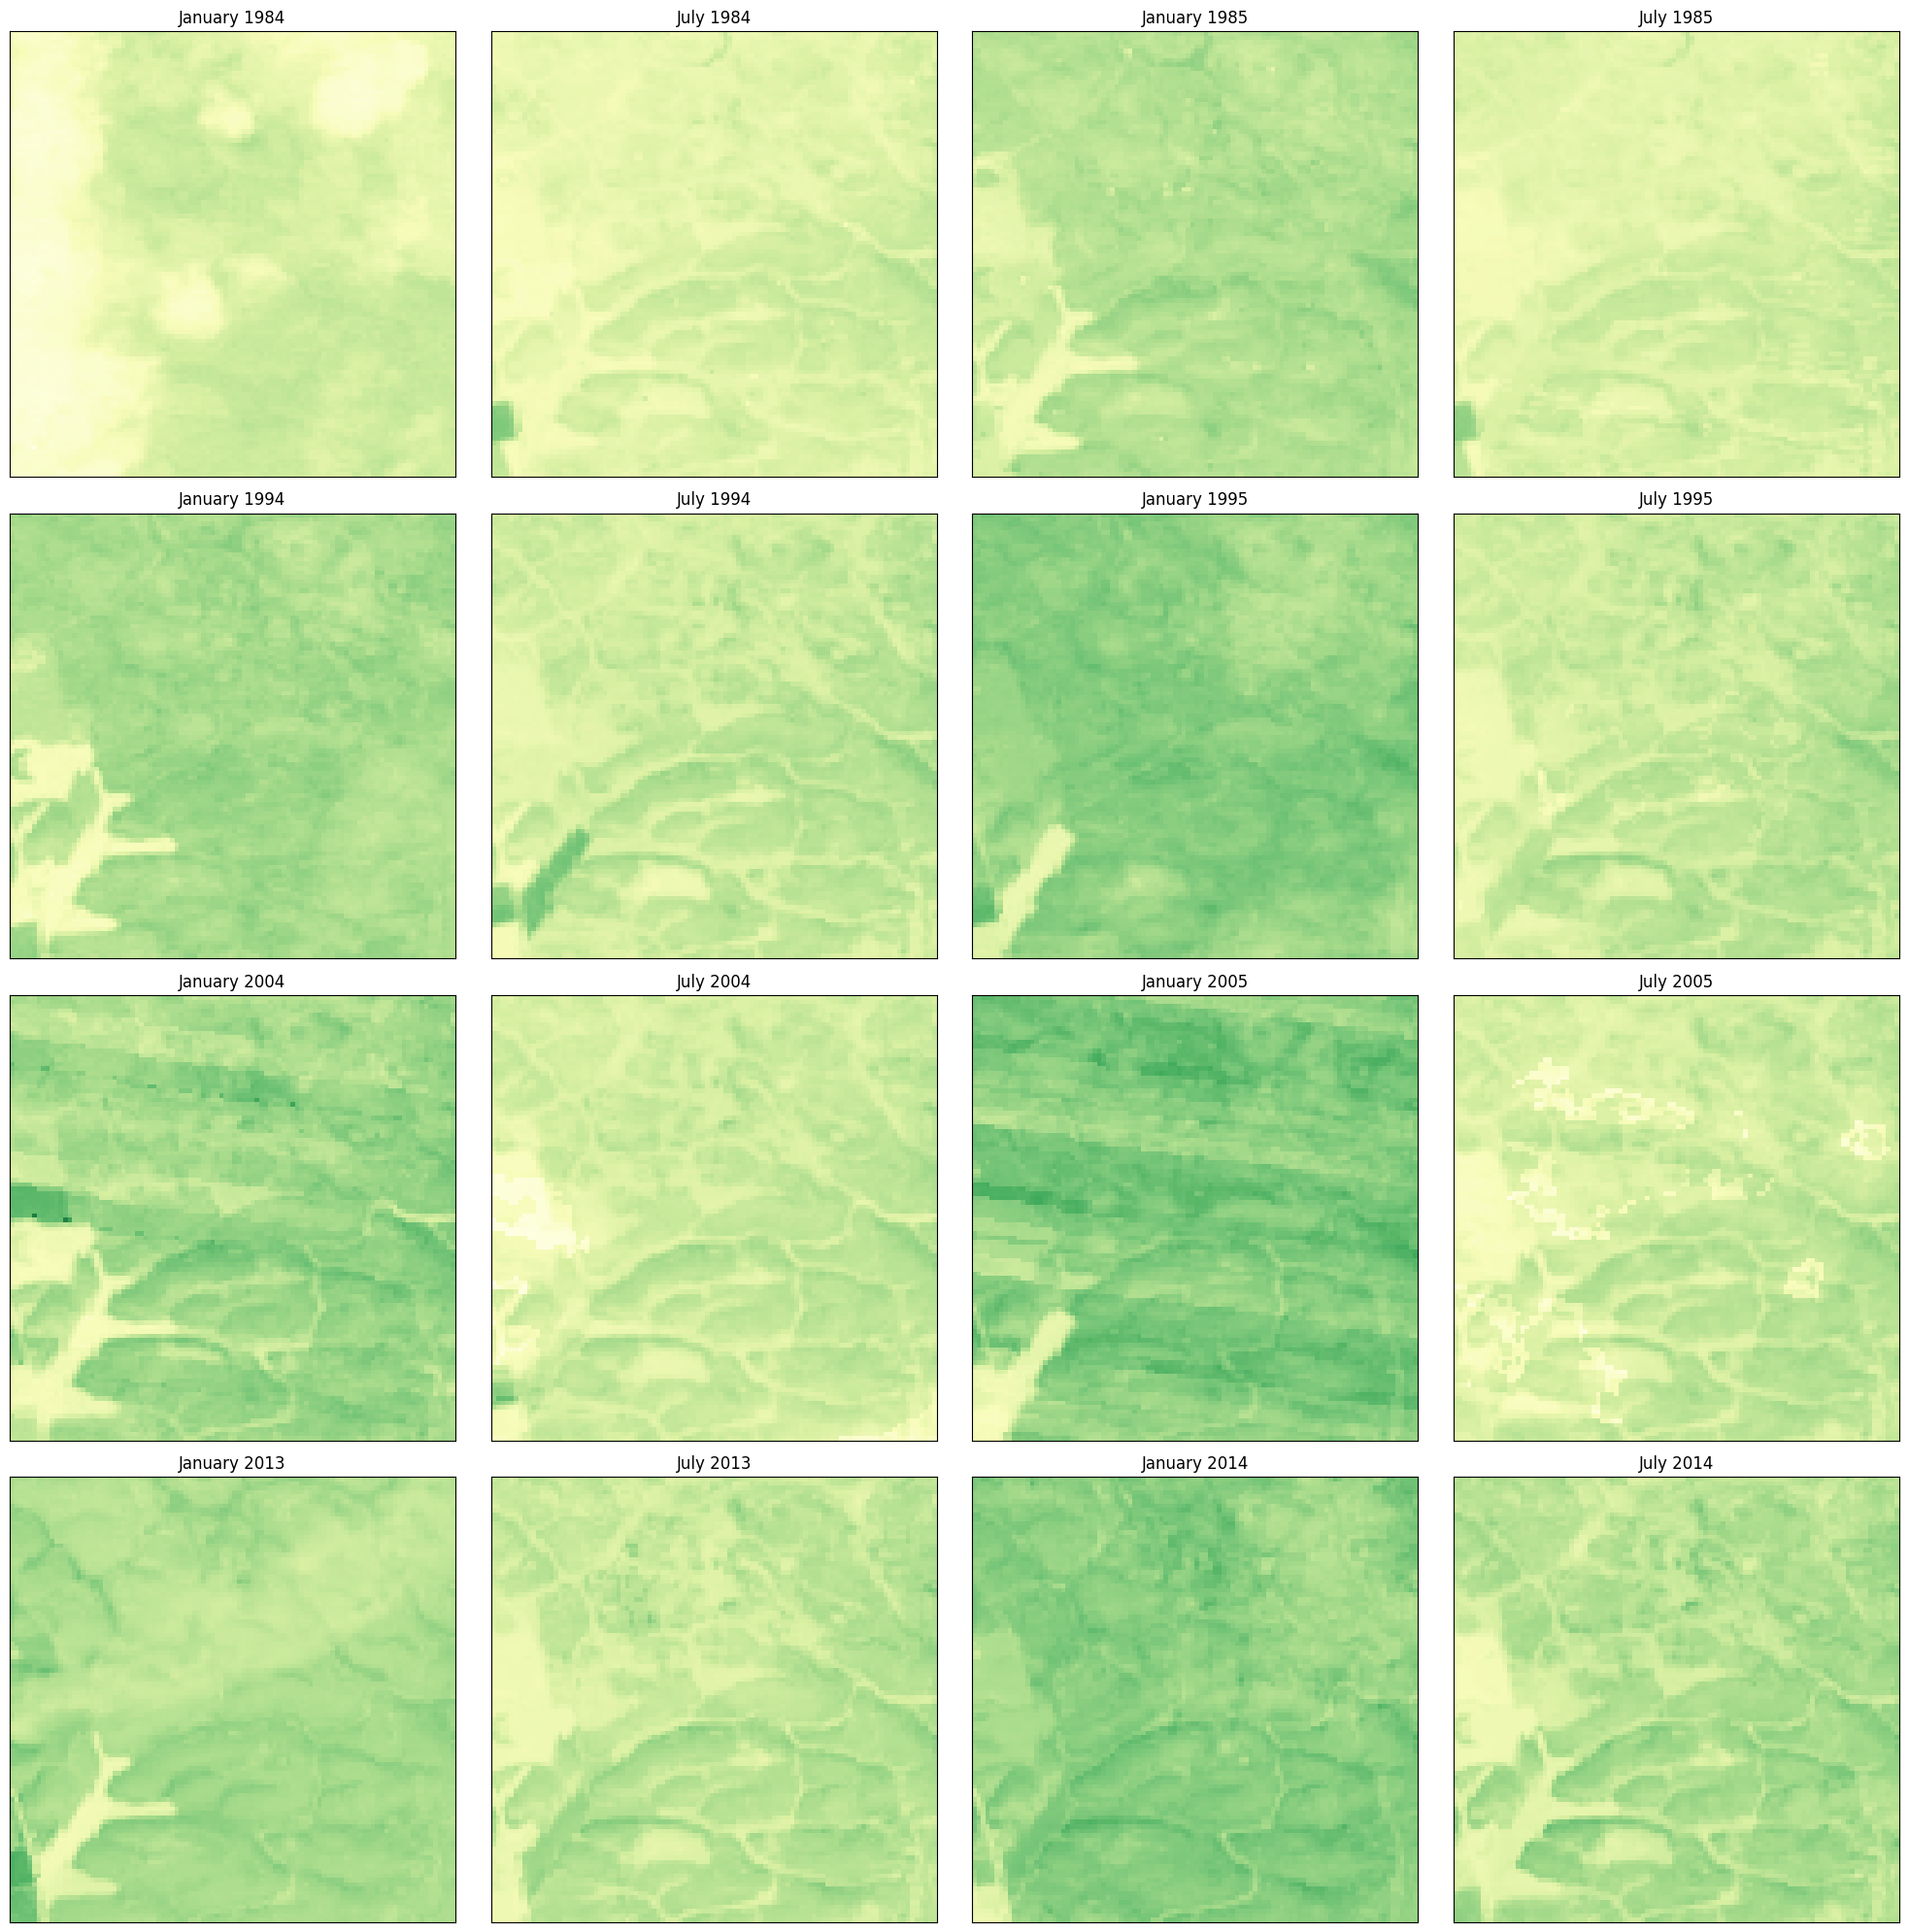

In [51]:
plot_ndvi_area_over_time(500, 500, 100)